# Analiza oglasov za delo

In [151]:
import pandas as pd

In [152]:
dela = pd.read_csv("podatki.csv\podatki.csv", index_col = "št_oglasa")

In [153]:
dela

,delo,lokacija,plača_neto[€/h],plača_bruto[€/h],opis,prosta_mesta,trajanje,delovnik,začetek_dela
št_oglasa,,,,,,,,,
435925,DELO V LOGISTIKI,ŠENTJUR,7.06,8.2,"Potrebujejo osebo za deklariranje, delo v logi...",1,DLJE ČASA (ZAČ. IN OBČ. DELO),DOPOLDAN,1. 9. 2024
435924,INŠTALACIJE,ŠTAJERSKA REGIJA,8.0,9.3,Iščejo polnoletni osebi za inštalacijska dela:...,2,PO DOGOVORU,DOPOLDAN,26. 8. 2024
435923,FINANČNE STORITVE,LJUBLJANA,9.0,10.46,Za naročnika iščejo dinamične in samoiniciativ...,5,DLJE ČASA (ZAČ. IN OBČ. DELO),DOPOLDAN,28. 8. 2024
435922,ADMINISTRATIVNA DELA,LJUBLJANA,7.31,8.5,Iščejo študenta/ko za študentsko delo na oddel...,1,DLJE ČASA (ZAČ. IN OBČ. DELO),DOPOLDAN,2. 9. 2024
435921,KONTROLA KAKOVOSTI,ŠKOFJA LOKA,6.45,7.5,Iščejo študenta/ko oz. absolventa/ko za pomoč ...,1,DLJE ČASA (ZAČ. IN OBČ. DELO),DOPOLDAN,2. 9. 2024
...,...,...,...,...,...,...,...,...,...
435357,DELO V AVTOPRALNICI,TRZIN,7.0,8.13,"Si želiš delo z ljudmi, sproščeno in zabavno o...",2,DLJE ČASA (ZAČ. IN OBČ. DELO),IZMENSKO,po dogovoru
435356,STREŽBA,ARCLIN PRI VOJNIKU,8.0,9.3,Lokal s prijaznimi gosti v svoj kolektiv vabi ...,1,DLJE ČASA (ZAČ. IN OBČ. DELO),PO DOGOVORU,15. 9. 2024
435355,POMIVALEC,LJUBLJANA,7.5,8.72,Iščejo pomivalca/ko za pomoč v kuhinji restavr...,1,PO DOGOVORU,IZMENSKO,po dogovoru


Preverjam katera dela v svojem opisu omenjajo izkušnje. V tabelo dodajam stolpec z vrednostima True, kadar opis omenja izkušnje in False kadar jih ne.

In [154]:
dela['izkušnje'] = dela['opis'].str.contains(r'izkušnje', case=False)

In [155]:
dela

,delo,lokacija,plača_neto[€/h],plača_bruto[€/h],opis,prosta_mesta,trajanje,delovnik,začetek_dela,izkušnje
št_oglasa,,,,,,,,,,
435925,DELO V LOGISTIKI,ŠENTJUR,7.06,8.2,"Potrebujejo osebo za deklariranje, delo v logi...",1,DLJE ČASA (ZAČ. IN OBČ. DELO),DOPOLDAN,1. 9. 2024,False
435924,INŠTALACIJE,ŠTAJERSKA REGIJA,8.0,9.3,Iščejo polnoletni osebi za inštalacijska dela:...,2,PO DOGOVORU,DOPOLDAN,26. 8. 2024,True
435923,FINANČNE STORITVE,LJUBLJANA,9.0,10.46,Za naročnika iščejo dinamične in samoiniciativ...,5,DLJE ČASA (ZAČ. IN OBČ. DELO),DOPOLDAN,28. 8. 2024,False
435922,ADMINISTRATIVNA DELA,LJUBLJANA,7.31,8.5,Iščejo študenta/ko za študentsko delo na oddel...,1,DLJE ČASA (ZAČ. IN OBČ. DELO),DOPOLDAN,2. 9. 2024,False
435921,KONTROLA KAKOVOSTI,ŠKOFJA LOKA,6.45,7.5,Iščejo študenta/ko oz. absolventa/ko za pomoč ...,1,DLJE ČASA (ZAČ. IN OBČ. DELO),DOPOLDAN,2. 9. 2024,False
...,...,...,...,...,...,...,...,...,...,...
435357,DELO V AVTOPRALNICI,TRZIN,7.0,8.13,"Si želiš delo z ljudmi, sproščeno in zabavno o...",2,DLJE ČASA (ZAČ. IN OBČ. DELO),IZMENSKO,po dogovoru,False
435356,STREŽBA,ARCLIN PRI VOJNIKU,8.0,9.3,Lokal s prijaznimi gosti v svoj kolektiv vabi ...,1,DLJE ČASA (ZAČ. IN OBČ. DELO),PO DOGOVORU,15. 9. 2024,False
435355,POMIVALEC,LJUBLJANA,7.5,8.72,Iščejo pomivalca/ko za pomoč v kuhinji restavr...,1,PO DOGOVORU,IZMENSKO,po dogovoru,True


Preštejmo, koliko oglasov omenja izkušnje in koliko jih ne.
Predpostavljam, da imajo dela, ki v opisu omenjajo izkušnje v povprečju višjo urno postavko, preverjam ali to drži. Še prej pretvorim vrednosti stolpcev s plačami v številske.

In [156]:
dela.groupby("izkušnje").size()

izkušnje
False    373
True     127
dtype: int64

In [157]:
dela["plača_neto[€/h]"] = pd.to_numeric(dela["plača_neto[€/h]"], errors='coerce')


In [158]:
povprečna_plača_izkušnje = dela.groupby("izkušnje")["plača_neto[€/h]"].mean()

In [159]:
povprečna_plača_izkušnje

izkušnje
False    7.643918
True     8.110323
Name: plača_neto[€/h], dtype: float64

Predpostavka drži. Zdaj si oglejmo lokacije dela. Preverimo kje je največ razpisanih del in kje so najbolje plačana.

In [160]:
dela_po_lokacijah = dela.groupby("lokacija").size().sort_values(ascending= False)

In [161]:
dela_po_lokacijah

lokacija
LJUBLJANA           163
MARIBOR              36
KOPER                17
CELJE                12
ŠKOFJA LOKA          11
                   ... 
ŠMARJE-SAP            1
ŠTAJERSKA REGIJA      1
ŽALEC                 1
ŽELEZNIKI             1
ŽUŽEMBERK             1
Length: 144, dtype: int64

Text(0, 0.5, 'število del na lokaciji')

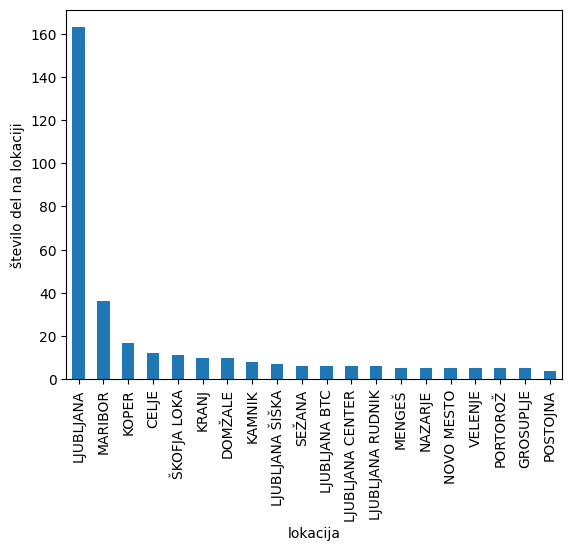

In [162]:
prikaz_dela_po_lokacijah = dela_po_lokacijah.head(20).plot.bar()
prikaz_dela_po_lokacijah.set_ylabel("število del na lokaciji")

Pri analizi plač glede na lokacijo bom izpustila lokacije z dvema oglasoma ali manj.

In [163]:
štetje_lokacij = dela["lokacija"].value_counts()
pogoste_lokacije = štetje_lokacij[štetje_lokacij > 2].index
dela_pogoste_lokacije = dela[dela["lokacija"].isin(pogoste_lokacije)]

Text(0.5, 0, 'povprečna_neto_plača[€/h]')

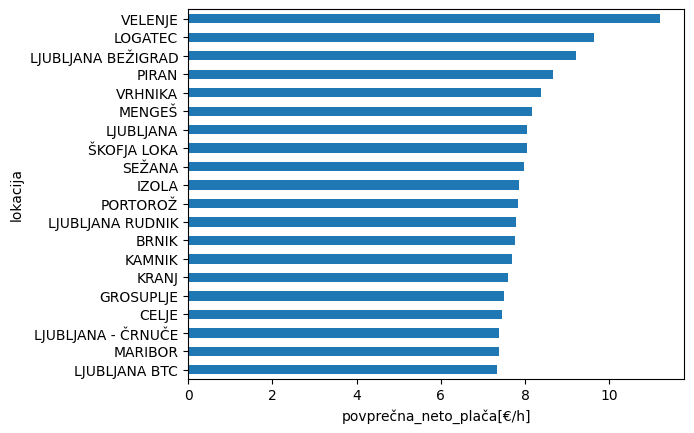

In [164]:
plača_po_lokacijah = dela_pogoste_lokacije.groupby("lokacija")["plača_neto[€/h]"].mean().sort_values().tail(20).plot(kind = "barh")
plača_po_lokacijah.set_xlabel("povprečna_neto_plača[€/h]")
